# Построение модели ARIMA для RTSI

В этой программе рассмотрим построение модели ARIMA для RTSI. 
Известны данные по индексу RTSI за 2017-2018 года, необходимо построить прогноз на следующее полугодие 2019 года.

In [13]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import urllib.request
import datetime
import time
import random


Populating the interactive namespace from numpy and matplotlib


Введем тикеры, акции, входящие в индекс, число акций и веса. Далее произведем импорт цен акций.

In [14]:
tickers={'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001,'FIVE':7,'DSKY':8,'SFIN':9,'RNFT':9}
# Акции, входящие в индекс
RTSI=['GAZP','SBER','SBERP','LKOH','GMKN','YNDX','NVTK','TATN','TATNP','ROSN','SNGS','SNGSP','MGNT','FIVE','MTSS','POLY','ALRS','CHMF','PLZL','IRAO','NLMK','VTBR','MOEX','PHOR','TRNFP','MAGN','RTKM','RUAL','AFLT','PIKK','HYDR','FEES','AFKS','LSRG','CBOM','UPRO','DSKY','LNTA','SFIN','RNFT','MVID']
#RTSI = list((tickers.keys()))
# Число акций
Q=[23673512900, 21586948000, 1000000000, 715000000, 158245476, 292567655, 3036306000, 2178690700, 147508500, 10598177817, 35725994705, 7701998235, 101911355, 271572872, 1998381575, 470183404, 7364965630, 837718660, 133561119, 104400000000, 5993227240, 12960541337338, 2276401458, 129500000, 1554875, 11174330000, 2574914954, 15193014862, 1110616299, 660497344, 426288813551, 1274665323063, 9650000000, 103030215, 27079709866, 63048706145, 739000000, 487929660, 111637791, 294120000, 179768227]
# Веса в %
W=[15.00,	13.84,	1.16,	13.43,	6.26,	5.31,	5.31,	4.50,	0.81,	4.41,	2.28,	1.68,	2.48,	2.38,	2.22,	1.90,	1.73,	1.56,	1.52,	1.37,	1.33,	1.26,	1.16,	0.77,	0.69,	0.69,	0.62,	0.60,	0.46,	0.43,	0.41,	0.38,	0.34,	0.31,	0.27,	0.25,	0.21,	0.21,	0.19,	0.14,	0.13]

N=41


# Формируем дату и время
def dtformed(d,mn,y,h=0,m=0,s=0):
    return datetime.datetime(y,mn,d,h,m,s)


# Возвращает ID инструмента по его имени (внутренная функция)
def getID(name):
    return tickers[name]

# Выгрузка данных
def load(name, dtstart=datetime.datetime.today(),dtfin=datetime.datetime.today(),step=8, market=1, MSOR=1, mstimever=0, sourse='finam',moment='close'):
    # market - инструмент
    # 0 — начала свечи, 1 — окончания свечи
    # mstimever - не московское — mstimever=0; московское — mstime='on', mstimever='1'
    #  период котировок (тики, 1 мин., 5 мин., 10 мин., 15 мин., 30 мин., 1 час, 1 день, 1 неделя, 1 месяц)
    id =getID(name) # id инстурмента
    e = '.txt' # расширение получаемого файла: .txt либо .csv
    yf = str(dtstart.year)
    yt = str(dtfin.year)
    month_start = str(dtstart.month)
    day_start = str(dtstart.day)
    month_end = str(dtfin.month)
    day_end = str(dtfin.day)
    dtf = '3' # формат даты (1 — ггггммдд, 2 — ггммдд, 3 — ддммгг, 4 — дд/мм/гг, 5 — мм/дд/гг)
    tmf = '1' # формат времени (1 — ччммсс, 2 — ччмм, 3 — чч: мм: сс, 4 — чч: мм)
    sep = '5' # параметр разделитель полей (1 — запятая (,), 2 — точка (.), 3 — точка с запятой (;), 4 — табуляция (»), 5 — пробел ( ))
    sep2 = '1' # параметр разделитель разрядов (1 — нет, 2 — точка (.), 3 — запятая (,), 4 — пробел ( ), 5 — кавычка ('))
    datf = '1' # Перечень получаемых данных (1-6)
    at = '0' # добавлять заголовок в файл (0 — нет, 1 — да)

    year_start = yf[2:]
    year_end = yt[2:]
    mf = (int(month_start.replace('0', ''))) - 1
    mt = (int(month_end.replace('0', ''))) - 1
    df = (int(day_start.replace('0', ''))) - 1
    dt = (int(day_end.replace('0', ''))) - 1

    # Запрос
    str1='http://export.finam.ru/' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + str(e) + '?market=' + str(
            market) + '&em=' + str(id) + '&code=' + str(name) + '&apply=0&df=' + str(df) + '&mf=' + str(
            mf) + '&yf=' + str(yf) + '&from=' + str(day_start) + '.' + str(month_start) + '.' + str(yf) + '&dt=' + str(
            dt) + '&mt=' + str(mt) + '&yt=' + str(yt) + '&to=' + str(day_end) + '.' + str(month_end) + '.' + str(
            yt) + '&p=' + str(step) + '&f=' + str(name) + '_' + str(year_start) + str(month_start) + str(
            day_start) + '_' + str(year_end) + str(month_end) + str(day_end) + '&e=' + str(e) + '&cn=' + str(
            name) + '&dtf=' + str(dtf) + '&tmf=' + str(tmf) + '&MSOR=' + str(MSOR) + '&mstimever=' + str(
            mstimever) + '&sep=' + str(sep) + '&sep2=' + str(sep2) + '&datf=' + str(datf) + '&at=' + str(at)
    result = urllib.request.urlopen(str1)

    # Выделение нужных данных
    content = str(result.read())
    print(name)
    stokelist=content.split(r'\r\n')
    n=len(stokelist)
    price=list()
    for k in range(n-1):
        stokelist1=stokelist[k].split(' ')
        price.append(stokelist1[7])

    return price


PRICE=[]
PRICE1=[]

print('Импорт цен акций...')

k=0
while k<N:
    try:
        PRICE.append(load(RTSI[k], dtformed(3, 1, 2019), dtformed(31,12,2019)))
        k=k+1
    except:
        continue
    finally:
        time.sleep(random.randint(1, 2))
k=0
while k<N:
    try:
        PRICE1.append(load(RTSI[k], dtformed(3, 1, 2019), dtformed(3, 1, 2020),step=10))
        k=k+1
    except:
        continue
    finally:
        time.sleep(random.randint(1, 2))


L=len(PRICE[0])

Импорт цен акций...
GAZP
SBER
SBERP
LKOH
GMKN
YNDX
NVTK
TATN
TATNP
ROSN
SNGS
SNGSP
MGNT
FIVE
MTSS
POLY
ALRS
CHMF
PLZL
IRAO
NLMK
VTBR
MOEX
PHOR
TRNFP
MAGN
RTKM
RUAL
AFLT
PIKK
HYDR
FEES
AFKS
LSRG
CBOM
UPRO
DSKY
LNTA
SFIN
RNFT
MVID
GAZP
SBER
SBERP
LKOH
GMKN
YNDX
NVTK
TATN
TATNP
ROSN
SNGS
SNGSP
MGNT
FIVE
MTSS
POLY
ALRS
CHMF
PLZL
IRAO
NLMK
VTBR
MOEX
PHOR
TRNFP
MAGN
RTKM
RUAL
AFLT
PIKK
HYDR
FEES
AFKS
LSRG
CBOM
UPRO
DSKY
LNTA
SFIN
RNFT
MVID


Получим значение индекса RTSI

In [15]:
def getindex(PRICE):
    indexat030119 = 1086.8 # Значение индекса на 1-й торговый день 2019 года
    s=list()
    I=list()
    L=len(PRICE[0])
    for j in range(L):
        s1=0.0
        for k in range(N):
            s1=s1+Q[k]*float(PRICE[k][j])*(W[k]/100)
        s.append(s1)
        I.append(indexat030119*s[j]/s[0])
    return I


Y=getindex(PRICE)
Y=np.asarray(Y)

In [16]:
base = datetime.datetime(2019, 1,3 )
X= numpy.array([base + datetime.timedelta(days=i) for i in range(L)])

Здесь построим график индекса RTSI

array([1086.8       , 1104.13732769, 1097.50743347, 1112.03112593,
       1119.60165169, 1124.06152456, 1121.21057055, 1118.16331684,
       1115.45147696, 1121.53618947, 1134.94366285, 1131.5292607 ,
       1131.11260318, 1141.17778491, 1139.51350597, 1147.33855872,
       1136.22798414, 1149.80155754, 1157.90633269, 1162.10876085,
       1161.53431322, 1162.20006636, 1176.35234773, 1171.27258876,
       1152.68124883, 1149.846882  , 1157.1463599 , 1171.44595832,
       1145.44079875, 1125.24737476, 1142.49641864, 1133.20919715,
       1125.4132381 , 1138.88235478, 1129.37426864, 1139.93938648,
       1141.76999486, 1142.33328077, 1143.67604387, 1144.59632057,
       1138.65311524, 1135.35785104, 1131.41170086, 1145.90848423,
       1136.66735242, 1131.33417404, 1132.13255925, 1135.20654626,
       1129.10242391, 1137.40373312, 1140.55771882, 1146.52163148,
       1155.94588334, 1157.75172533, 1149.02046576, 1154.33577854,
       1161.35611476, 1150.51796355, 1153.43924251, 1156.05281

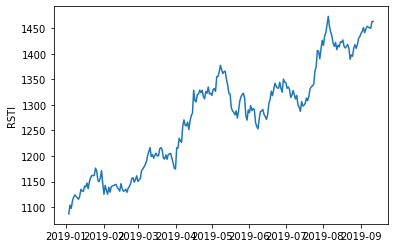

In [17]:
plt.plot(X,Y)

plt.ylabel('RSTI') 
X
Y

In [21]:
df = pd.DataFrame(data=np.stack((X,Y),axis=1),columns=['data','id'])

In [22]:
df

,data,id
0,2019-01-03,1086.8
1,2019-01-04,1104.14
2,2019-01-05,1097.51
3,2019-01-06,1112.03
4,2019-01-07,1119.6
...,...,...
247,2019-09-07,1452.22
248,2019-09-08,1450.74
249,2019-09-09,1450.02
250,2019-09-10,1463.18


Здесь определим Критерий Дики-Фуллера, проверку стационарности и STL-декомпозиция ряда:

Критерий Дики-Фуллера: p=0.777686


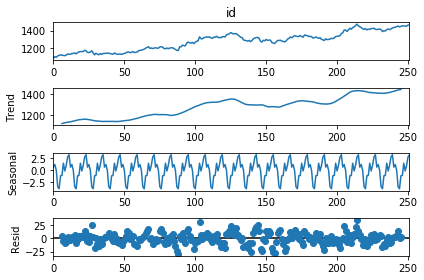

In [23]:
sm.tsa.seasonal_decompose(df.id,period=12).plot()
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.id)[1])

# Стабилизация дисперсии

Сделаем преобразование Бокса-Кокса для стабилизации дисперсии. Получим оптимальный параметр преобразования Бокса-Кокса:

Оптимальный параметр преобразования Бокса-Кокса: 0.802585
Критерий Дики-Фуллера: p=0.764316


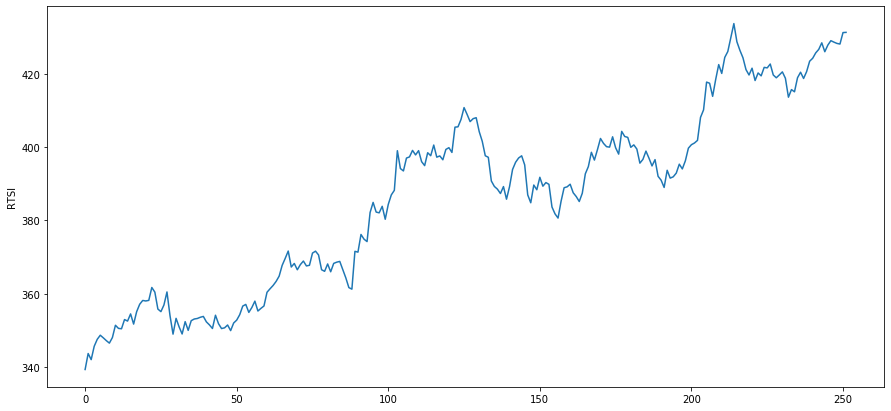

In [25]:

df['sales_box'], lmbda = stats.boxcox(pd.to_numeric(df.id))
plt.figure(figsize(15,7))
df.sales_box.plot()
plt.ylabel(u'RTSI')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.sales_box)[1])


# Стационарность

Критерий Дики-Фуллера отвергает гипотезу нестационарности, но визуально в данных виден тренд. Попробуем сезонное дифференцирование; сделаем на продифференцированном ряде STL-декомпозицию и проверим стационарность:

Критерий Дики-Фуллера: p=0.013487


<Figure size 1080x720 with 0 Axes>

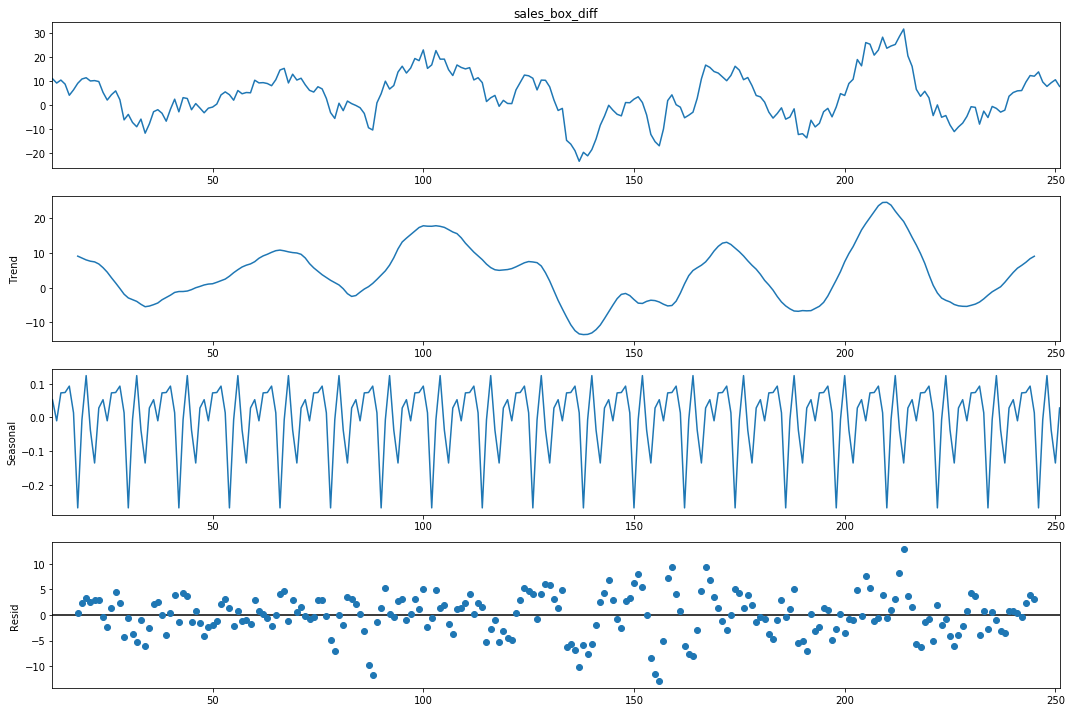

In [26]:
df['sales_box_diff'] = df.sales_box - df.sales_box.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df.sales_box_diff[12:],period=12).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.sales_box_diff[12:])[1])

Критерий Дики-Фуллера не отвергает гипотезу нестационарности, и полностью избавиться от тренда не удалось. Попробуем добавить ещё обычное дифференцирование:

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

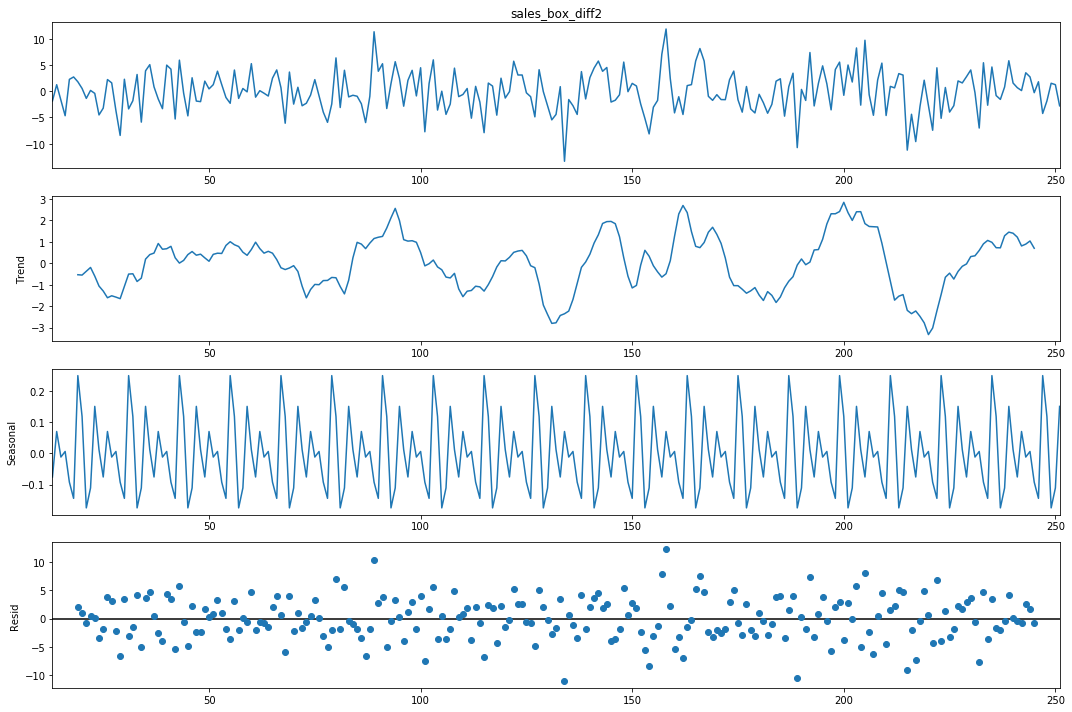

In [27]:
df['sales_box_diff2'] = df.sales_box_diff - df.sales_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(df.sales_box_diff2[13:],period=12).plot()   
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df.sales_box_diff2[13:])[1])

Гипотеза нестационарности отвергается, и визуально ряд выглядит лучше — тренда больше нет.

# Подбор модели

Начальные приближения: Q=1, q=2, P=1, p=4

In [28]:
ps = range(0, 5)
d=1
qs = range(0, 3)
Ps = range(0, 2)
D=1
Qs = range(0, 2)

In [29]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

60

Выводим параметры, на которых модель не обучается и переходим к следующему набору:

In [34]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df.sales_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 1min 32s


Если в предыдущей ячейке возникает ошибка, убедитесь, что обновили statsmodels до версии не меньше 0.8.0rc1

In [35]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters          aic
1   (0, 0, 0, 1)  1211.121896
29  (2, 1, 0, 1)  1211.727516
21  (1, 2, 0, 1)  1212.031263
3   (0, 0, 1, 1)  1212.375349
33  (2, 2, 0, 1)  1212.496606


Получим лучшую модель:

In [36]:
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            sales_box   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -603.561
Date:                              Fri, 27 Nov 2020   AIC                           1211.122
Time:                                      01:34:46   BIC                           1218.075
Sample:                                           0   HQIC                          1213.924
                                              - 252                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9990      4.621     -0.216      0.829     -10.056       8.058
sigma2         7.85

Её остатки:

Критерий Стьюдента: p=0.671462
Критерий Дики-Фуллера: p=0.000000


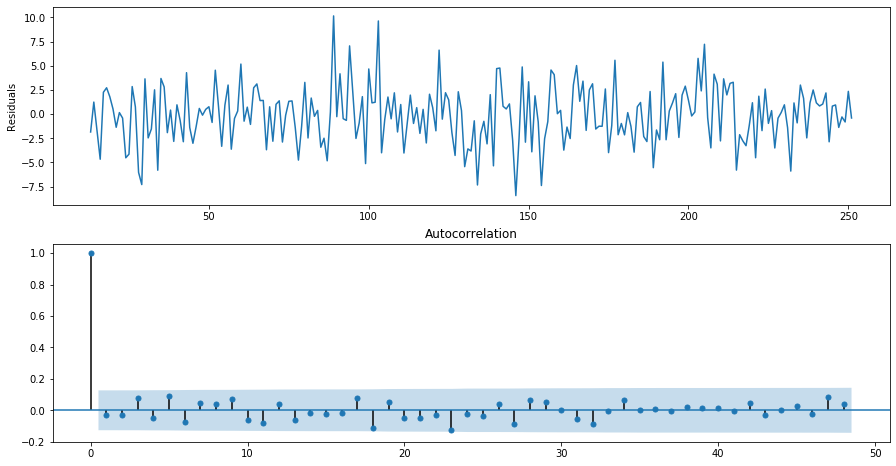

In [37]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Остатки несмещены (подтверждается критерием Стьюдента) стационарны (подтверждается критерием Дики-Фуллера и визуально), неавтокоррелированы (подтверждается критерием Льюнга-Бокса и коррелограммой). Посмотрим, насколько хорошо модель описывает данные:

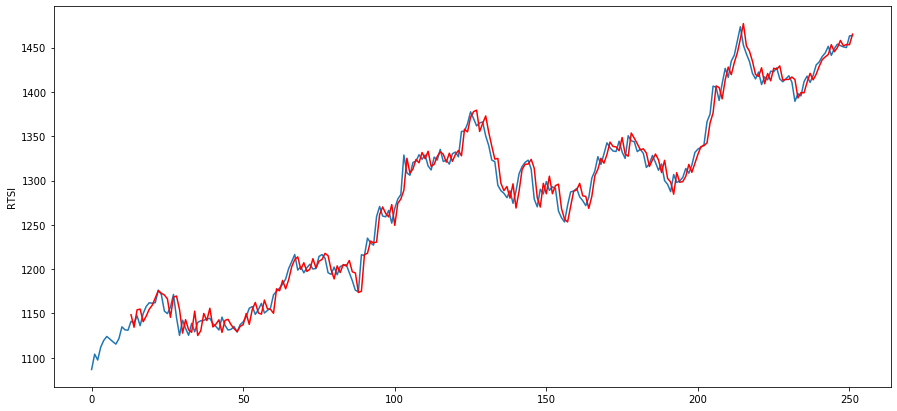

In [38]:
df['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
df.id.plot()
df.model[13:].plot(color='r')
plt.ylabel('RTSI')
pylab.show()

# Прогноз

Построим прогноз

TypeError: float() argument must be a string or a number, not 'Timestamp'

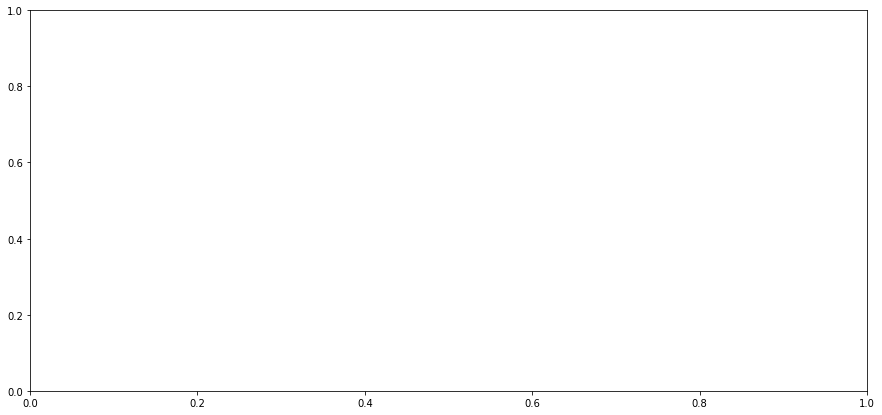

In [43]:

df2= df[['id']]
date_list = [datetime.datetime.strptime("2019-01-10", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,6)]
future = pd.DataFrame(index=date_list, columns= df2.columns)
df2 = pd.concat([df2, future])
df2['forecast'] = invboxcox(best_model.predict(start=252, end=280), lmbda)


plt.figure(figsize(15,7))
plt.plot(df2.id[:254])
df2.forecast.plot(color='r')
plt.ylabel('RTSI')
pylab.show()